### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [24]:
print('shape of original dataframe:')
print(data.shape)
print('\ndata.info():\n')
data.info()
print('\n')
print('NaN count per column:')
data.isnull().sum()


shape of original dataframe:
(12684, 26)

data.info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [3]:
##  I decided to drop all the NaNs, since all of them are in columns where dtype is object.
##  If dtype is object, it is difficult to replace NaN with mean, median, interpolated value, etc.
##  Since car column has greater than 12000 NaN rows which are most of the rows, I decided to delete this column,
##  and then delete the rows with NaN for the remaining columns.  For car column, since less than 1% of the rows
##  have valid data, we cannot get anything useful out of this column.
##  Approximately 95.2% of the rows (12079/12684) are still remaining even after cleaning out the rows with NaN, which
##  means we did not lose significant amount of data.
data_NonNull = data.dropna(thresh=12000, axis=1)  # drop columns with NaN count > 12000
data_NonNull = data_NonNull.dropna() # drop rows with NaN for the remaining columns
print('shape of cleaned dataframe:')
print(data_NonNull.shape)
print('\ndata_NonNull.info():\n')
print(data_NonNull.info())
print('NaN count per column:')
print(data_NonNull.isnull().sum())

shape of cleaned dataframe:
(12079, 25)

data_NonNull.info():

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079

4. What proportion of the total observations chose to accept the coupon? 



In [4]:
## I looked at total observations within the cleaned dataframe (data_NonNull)
accept = data_NonNull['Y'].sum() # since Y=1 represents accept and Y=0 represents reject, using sum here
total = data_NonNull['Y'].count() # total # of entries (either 1 or 0)
accept_rate = accept/total
print(f"Coupon acceptance rate for dataframe after data cleaning = {accept_rate}")

## I also looked at the coupon acceptance rate for the original dataframe before the data cleaning, to 
## confirm that the acceptance rate is similar to that of the cleaned dataframe.
## This is to verify that the method I used to handle the NaN's is reasonable and makes sense.
accept = data['Y'].sum() # since Y=1 represents accept and Y=0 represents reject, using sum here
total = data['Y'].count() # total # of entries (either 1 or 0)
accept_rate = accept/total
print(f"Coupon acceptance rate for original dataframe before cleaning = {accept_rate}")

## Conclusion here is these 2 acceptance ratios are very close to each other, and that using
## data_NonNull (cleaned dataframe) makes sense.

Coupon acceptance rate for dataframe after data cleaning = 0.5693352098683666
Coupon acceptance rate for original dataframe before cleaning = 0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

Text(0, 0.5, 'count')

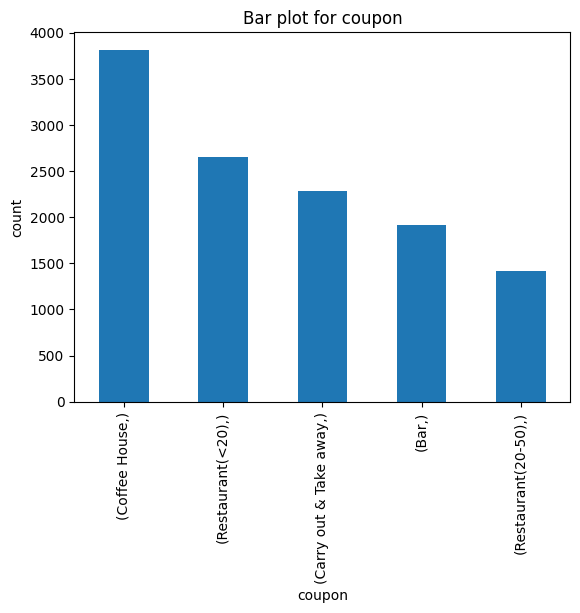

In [11]:
ax = data_NonNull[['coupon']].value_counts().plot(kind='bar', title='Bar plot for coupon')
ax.set_ylabel('count')

## Conclusion here is the largest number of coupons given here were for coffee houses,
## second largest number was for restaurant < 20, and smallest number was for restaurant (20 to 50).

Text(0, 0.5, '# of drivers')

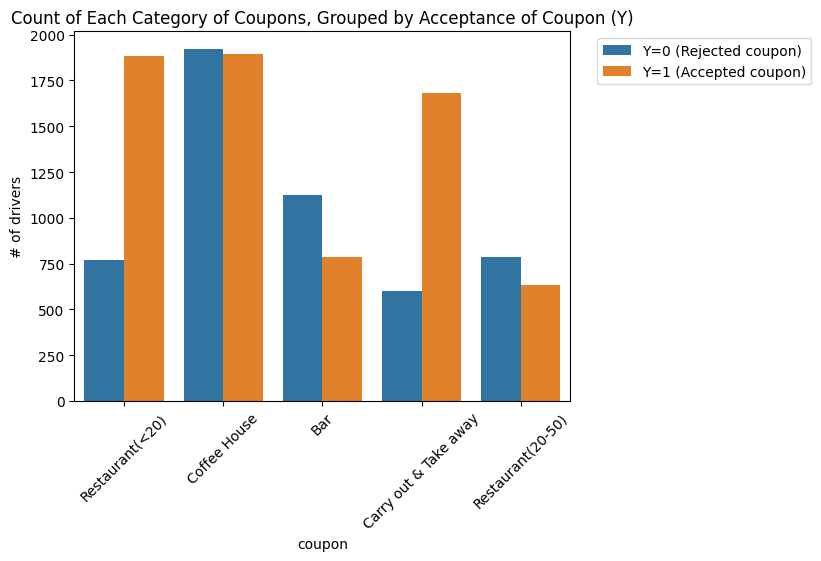

In [66]:
## I used a countplot since appearance is similar to barplot, but this plot tells more info such as which coupon
## type has higher probability of driver accepting it, and which coupon type has higher rejection probability.
sns.countplot(x='coupon', data=data_NonNull, hue='Y')
plt.title('Count of Each Category of Coupons, Grouped by Acceptance of Coupon (Y)')
plt.legend(labels=['Y=0 (Rejected coupon)','Y=1 (Accepted coupon)'], \
          bbox_to_anchor=(1.5,1))
plt.xticks(rotation=45)
plt.ylabel('# of drivers')

## Conclusion here is Carry out/Takeaway and Restaurant < 20 are the coupon categories with highest probability
## of acceptance.

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Histogram of Temperature Distribution')

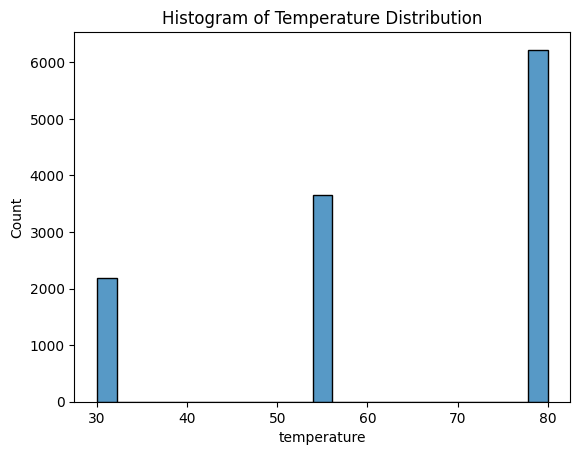

In [13]:
sns.histplot(x='temperature', data=data_NonNull)
plt.title('Histogram of Temperature Distribution')

## Conclusion from this histogram is that largest number of coupons were given at high temperature (80), and
## a smaller proportion of coupons were given at cold temperature (30).  As temperature increases, the 
## number of coupons given also increases.

Text(0, 0.5, '# of drivers')

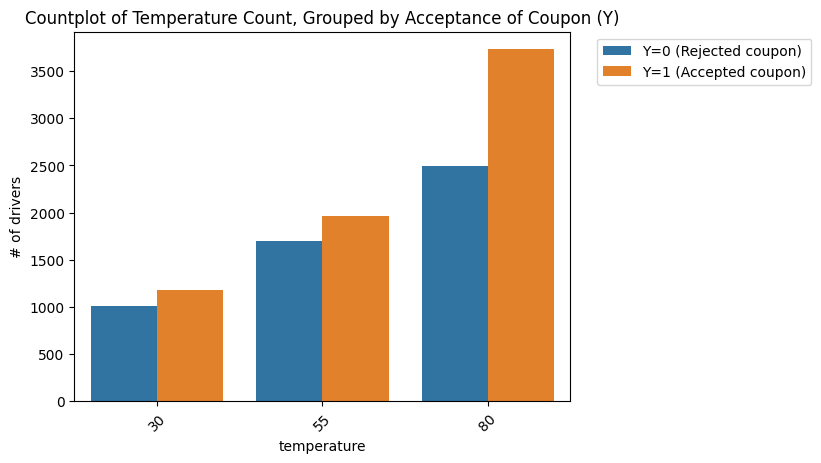

In [67]:
sns.countplot(x='temperature', data=data_NonNull, hue='Y')
plt.title('Countplot of Temperature Count, Grouped by Acceptance of Coupon (Y)')
plt.legend(labels=['Y=0 (Rejected coupon)','Y=1 (Accepted coupon)'], \
          bbox_to_anchor=(1.5,1))
plt.xticks(rotation=45)
plt.ylabel('# of drivers')

I decided to look at count plot in addition to histogram of temperature, to gain better insight of probability of customer accepting coupon as temperature changes.  Probability of customer accepting coupon gets better as temperature gets warmer or more pleasant.  Customer wanting to remain indoors during colder weather increases chances of rejecting the coupon.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [69]:
## I used the query command to filter this dataframe to only the rows with bar coupons.
df_bar = data_NonNull.query("coupon == 'Bar'")

2. What proportion of bar coupons were accepted?


In [10]:
accept = df_bar['Y'].sum() # since Y=1 represents accept and Y=0 represents reject, using sum here
total = df_bar['Y'].count() # total # of entries (either 1 or 0)
accept_rate = accept/total
print(f"Proportion of bar coupons accepted = {accept_rate}")

## Conclusion is that acceptance rate for bar coupons is lower than the acceptance rate of all the coupons.
## 41% acceptance for bar coupons vs. 57% for the overall coupon population

Proportion of bar coupons accepted = 0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [72]:
def bar_lowFreq(s):
    lowFreqList = ['never','less1','1~3'] # whoever went to bar 3 or less times is in lowFreqList
    if (s in lowFreqList):
        return '<=3_times'
    else: return '>3_times'
    
# create new column 'Freq' indicating <=3 or >3 times in terms of frequency of visiting the bar    
df_bar.loc[:, 'Freq'] = df_bar['Bar'].apply(bar_lowFreq)

# group by bar visit frequency to compute total # of coupons for each group
df_bar_fTotal = df_bar.groupby('Freq')[['Y']].agg('count')
# group by bar visit frequency to compute # of coupons accepted for each group
df_bar_fAccept = df_bar.groupby('Freq')[['Y']].agg('sum')
# compute accept ratio by dividing # of coupons accepted by total # of coupons for each group
df_bar_fAcceptRatio = df_bar_fAccept / df_bar_fTotal
df_bar_fAcceptRatio.rename(columns={'Y':'CouponAcceptRatio'}, inplace=True)
df_bar_fAcceptRatio

## Summary is that there is higher acceptance rate for the group that went to the bar more than 3 times, 
## compared to the group that went to the bar less than 3 times.

,CouponAcceptRatio
Freq,
<=3_times,0.372674
>3_times,0.761658


Text(0, 0.5, '# of drivers')

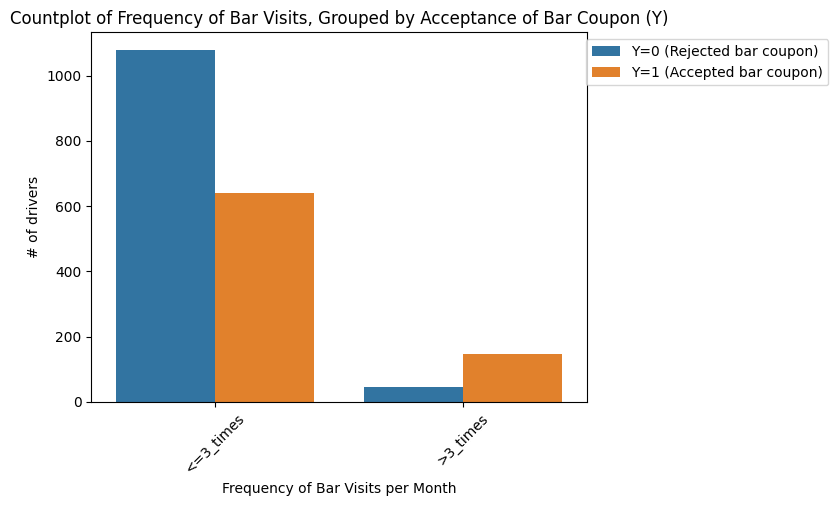

In [73]:
sns.countplot(x='Freq', data=df_bar, hue='Y')
plt.title('Countplot of Frequency of Bar Visits, Grouped by Acceptance of Bar Coupon (Y)')
plt.legend(labels=['Y=0 (Rejected bar coupon)','Y=1 (Accepted bar coupon)'], \
          bbox_to_anchor=(1.5,1))
plt.xlabel('Frequency of Bar Visits per Month')
plt.xticks(rotation=45)
plt.ylabel('# of drivers')

## This plot below also shows that drivers who visit the bar more frequently (> 3 times per month)
## are more likely to accept the bar coupon compared to drivers who visit the bar less often.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [75]:
def cat2(freq, age):
    ## cat2 is category 2 where drivers go to bar more than once a month and are over age 25
    gtOnce = ['1~3','4~8','gt8'] # whoever went to bar more than once
    age_gt25 = ['26','31','36','41','46','50plus'] # whoever is over age 25
    ## check for both visiting the bar more than once and age over 25
    if ((freq in gtOnce) and (age in age_gt25)):
        return 'freq>=1_and_age>25'
    else: return 'all_others'
    
# create new column 'cat2' indicating (go to bar more than once and age > 25) vs. all others    
df_bar.loc[:,'cat2'] = df_bar.apply(lambda r: cat2(r['Bar'], r['age']), axis=1)

# group by (go to bar more than once and age > 25) vs. all others to compute total # of coupons for each group
df_bar_grTotal = df_bar.groupby('cat2')[['Y']].agg('count')
# group by (go to bar more than once and age > 25) vs. all others to compute # of coupons accepted for each group
df_bar_grAccept = df_bar.groupby('cat2')[['Y']].agg('sum')
# compute accept ratio by dividing # of coupons accepted by total # of coupons for each group
df_bar_grAcceptRatio = df_bar_grAccept / df_bar_grTotal
df_bar_grAcceptRatio.rename(columns={'Y':'CouponAcceptRatio'}, inplace=True)
df_bar_grAcceptRatio

## Summary is that drivers who visit the bar more than once in a month (freq >= 1) and are over age 25 are 
## more likely to accept the bar coupon compared to all others.

,CouponAcceptRatio
cat2,
all_others,0.337748
freq>=1_and_age>25,0.689826


Text(0, 0.5, '# of drivers')

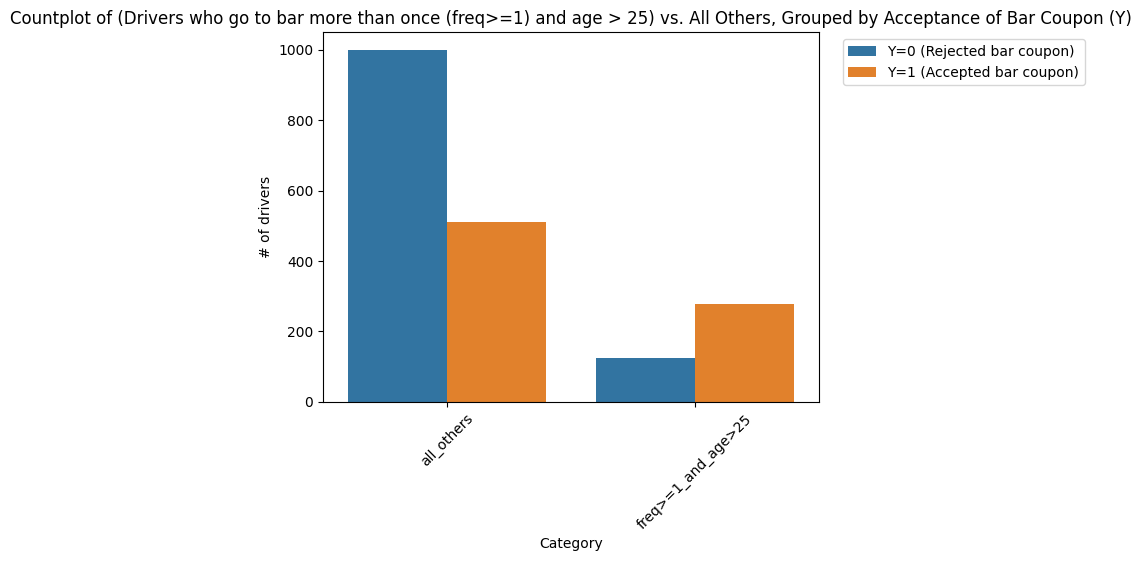

In [79]:
sns.countplot(x='cat2', data=df_bar, hue='Y')
plt.title('Countplot of (Drivers who go to bar more than once (freq>=1) and age > 25) vs. All Others, Grouped by Acceptance of Bar Coupon (Y)')
plt.legend(labels=['Y=0 (Rejected bar coupon)','Y=1 (Accepted bar coupon)'], \
          bbox_to_anchor=(1.55,1))
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.ylabel('# of drivers')

## This plot also shows that drivers who visit the bar more than once in a month (freq >= 1) and are over the age 25
## have higher probability of accepting the bar coupon compared to all others.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [82]:
def cat3(freq, passenger, occupation):
    ## cat3 is category 3 where drivers need to meet all 3 of these characteristics:
    ##   characteristic1: go to bars more than once a month
    ##   characteristic2: have passengers that are not a kid
    ##   characteristic3: have occupation other than farming, fishing, or forestry
    gtOnce = ['1~3','4~8','gt8'] # whoever went to bar more than once
    passengerTypes = ['Friend(s)','Partner'] # Having passengers who are not kids excludes Alone and Kid(s)
    occupationTypes = ['Farming Fishing & Forestry']
    
    ## check if driver satisfies all 3 characteristics
    characteristic1 = (freq in gtOnce)
    characteristic2 = (passenger in passengerTypes)
    characteristic3 = (occupation not in occupationTypes)
    if (characteristic1 and characteristic2 and characteristic3):
        return '3_characteristics'
    else: return 'all_others'
    
# create new column 'cat3' indicating having all 3 characteristics mentioned above (cat3 function documentation)
# vs. all others    
df_bar.loc[:,'cat3'] = df_bar.apply(lambda r: cat3(r['Bar'], r['passanger'], r['occupation']), axis=1)

# group by all 3 characteristics vs. all others to compute total # of coupons for each group
df_bar_grTotal = df_bar.groupby('cat3')[['Y']].agg('count')
# group by all 3 characteristics vs. all others to compute # of coupons accepted for each group
df_bar_grAccept = df_bar.groupby('cat3')[['Y']].agg('sum')
# compute accept ratio by dividing # of coupons accepted by total # of coupons for each group
df_bar_grAcceptRatio = df_bar_grAccept / df_bar_grTotal
df_bar_grAcceptRatio.rename(columns={'Y':'CouponAcceptRatio'}, inplace=True)
df_bar_grAcceptRatio

## Summary is that drivers who have all 3 characteristics documented in function cat3 above are more likely to
## accept bar coupons compared to all others.

,CouponAcceptRatio
cat3,
3_characteristics,0.714286
all_others,0.378770


Text(0, 0.5, '# of drivers')

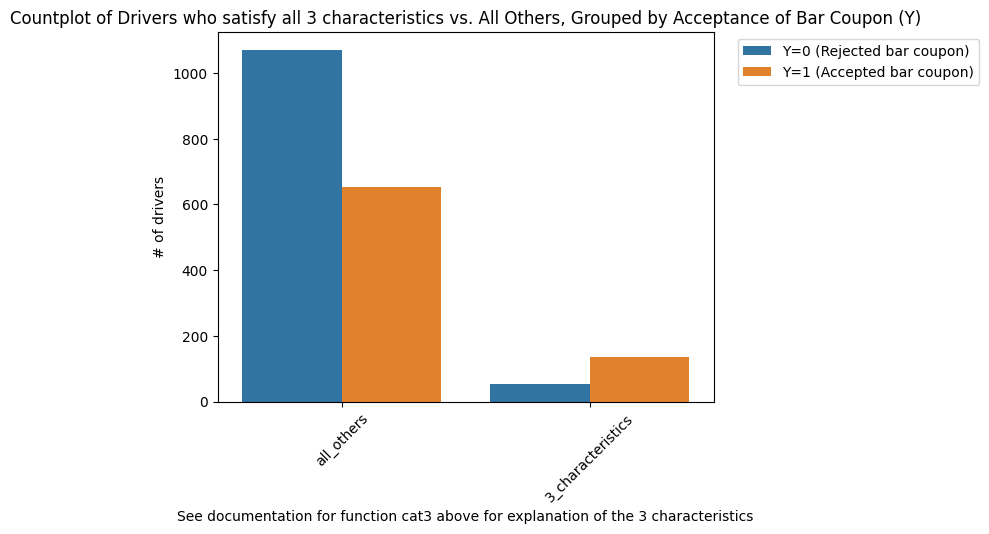

In [83]:
sns.countplot(x='cat3', data=df_bar, hue='Y')
plt.title('Countplot of Drivers who satisfy all 3 characteristics vs. All Others, Grouped by Acceptance of Bar Coupon (Y)')
plt.legend(labels=['Y=0 (Rejected bar coupon)','Y=1 (Accepted bar coupon)'], \
          bbox_to_anchor=(1.55,1))
plt.xlabel('See documentation for function cat3 above for explanation of the 3 characteristics')
plt.xticks(rotation=45)
plt.ylabel('# of drivers')

## The plot below also indicates that drivers who go to bars more than once per month, drivers who
## have passengers that are not a kid, and drivers whose occupations are different from 
## farming, fishing, or forestry, are more likely to accept a bar coupon compared to everyone else.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [85]:
def catA_B_C(freq, passenger, marital, age, rest_cnt, income):
    ## catA_B_C defines categories A, B, and C, based on combinations of these 6 characteristics below:
    ##   characteristic1: go to bars more than once a month
    ##   characteristic2: have passengers that are not a kid
    ##   characteristic3: not widowed
    ##   characteristic4: age < 30
    ##   characteristic5: go to cheap restaurants more than 4 times a month
    ##   characteristic6: income < 50k
    gtOnce = ['1~3','4~8','gt8'] # whoever went to bar more than once
    passengerTypes = ['Friend(s)','Partner'] # Having passengers who are not kids excludes Alone and Kid(s)
    age_lt30 = ['below21','21','26'] # whoever is below age 30
    cheap_rest_gr4 = ['4~8','gt8'] # goes to cheap restaurant more than 4 times per month
    income_lt50k = ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999'] # income < 50k
    
    ## check if driver satisfies all 3 characteristics
    characteristic1 = (freq in gtOnce)
    characteristic2 = (passenger in passengerTypes)
    characteristic3 = (marital != 'Widowed')
    characteristic4 = (age in age_lt30)
    characteristic5 = (rest_cnt in cheap_rest_gr4)
    characteristic6 = (income in income_lt50k)
    if (characteristic1 and characteristic2 and characteristic3):
        return 'categoryA (freq>=1)' #  go to bars more than once a month, had passengers that were not a kid, and were not widowed 
    elif (characteristic1 and characteristic4): 
        return 'categoryB (freq>=1)' # go to bars more than once a month and are under the age of 30
    elif (characteristic5 and characteristic6):
        return 'categoryC' # go to cheap restaurants more than 4 times a month and income is less than 50K
    else: return 'other_drivers'
    
#df_bar[['maritalStatus']].value_counts()
#df_bar[['age']].value_counts()
#df_bar[['RestaurantLessThan20']].value_counts()
#df_bar[['income']].value_counts()

# create new column 'catA_B_C' indicating the 3 characteristics mentioned above (catA_B_C function documentation)
df_bar.loc[:,'catA_B_C'] = df_bar.apply(lambda r: catA_B_C(r['Bar'], r['passanger'], r['maritalStatus'],\
                                                      r['age'], r['RestaurantLessThan20'], r['income']),\
                                        axis=1)

# group by the above 3 characteristics to compute total # of coupons for each group
df_bar_grTotal = df_bar.groupby('catA_B_C')[['Y']].agg('count')
# group by the above 3 characteristics to compute # of coupons accepted for each group
df_bar_grAccept = df_bar.groupby('catA_B_C')[['Y']].agg('sum')
# compute accept ratio by dividing # of coupons accepted by total # of coupons for each group
df_bar_grAcceptRatio = df_bar_grAccept / df_bar_grTotal
df_bar_grAcceptRatio.rename(columns={'Y':'CouponAcceptRatio'}, inplace=True)
df_bar_grAcceptRatio

## Summary is as below:
## These 2 categories (Category A and Category B) below have high acceptance rate for bar coupon:
## go to bars more than once a month, had passengers that were not a kid, and were not widowed
## go to bars more than once a month and are under the age of 30
## This category, Category C, has low acceptance rate:
## go to cheap restaurants more than 4 times a month and income is less than 50K
## 
## The mapping between category and description is below:
## categoryA: go to bars more than once a month, had passengers that were not a kid, and were not widowed
## categoryB: go to bars more than once a month and are under the age of 30
## categoryC: go to cheap restaurants more than 4 times a month and income is less than 50K

,CouponAcceptRatio
catA_B_C,
categoryA (freq>=1),0.714286
categoryB (freq>=1),0.694064
categoryC,0.321586
other_drivers,0.334898


Text(0, 0.5, '# of drivers')

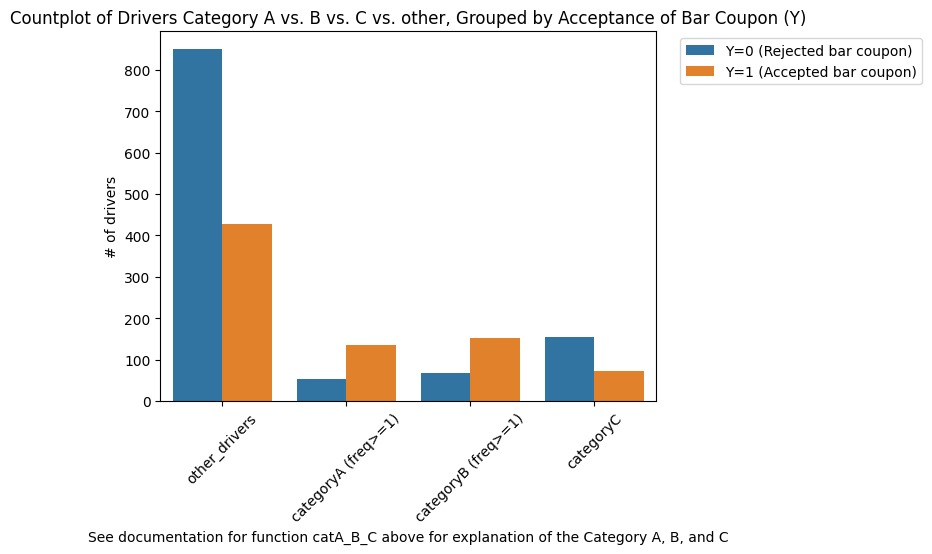

In [86]:
sns.countplot(x='catA_B_C', data=df_bar, hue='Y')
plt.title('Countplot of Drivers Category A vs. B vs. C vs. other, Grouped by Acceptance of Bar Coupon (Y)')
plt.legend(labels=['Y=0 (Rejected bar coupon)','Y=1 (Accepted bar coupon)'], \
          bbox_to_anchor=(1.55,1))
plt.xticks(rotation=45)
plt.xlabel('See documentation for function catA_B_C above for explanation of the Category A, B, and C')
plt.ylabel('# of drivers')

## In this plot below, it indicates Category A and Category B have higher probability of driver accepting the
## coupon compared to Category C.  The categories where driver visits the bar more than once per month (freq>=1)
## correlates to high probability of bar coupon acceptance.

The mapping between category and description for the plot above is described below:
categoryA: go to bars more than once a month, had passengers that were not a kid, and were not widowed
categoryB: go to bars more than once a month and are under the age of 30
categoryC: go to cheap restaurants more than 4 times a month and income is less than 50K

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Overall conclusion from the above data is the more frequently the driver visits the bar, higher the probability of that driver accepting the bar coupon, especially if the frequency of visits is greater than 1 per month.  In most other cases, probability of driver accepting the bar coupon is low.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [4]:
## I decided to look at the Coffee House coupon group for this analysis.
df_coffee = data_NonNull.query('coupon == "Coffee House"')

In [8]:
accept = df_coffee['Y'].sum() # since Y=1 represents accept and Y=0 represents reject, using sum here
total = df_coffee['Y'].count() # total # of entries (either 1 or 0)
accept_rate = accept/total
print(f"Proportion of coffee house coupons accepted = {accept_rate}")

Proportion of coffee house coupons accepted = 0.49633123689727465


In [9]:
df_coffee.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


In [15]:
def passengerType(passenger):
    ## This function checks if the driver has a passenger who is not a kid.
    nonKidPassengers = ['Friend(s)','Partner'] # Having passengers who are not kids excludes Alone and Kid(s)
    
    if (passenger in nonKidPassengers):
        return 'had_non_kid_passengers'
    else: return 'all_others'
    
# create new column 'PassengerType' indicating whether the driver had a passenger who was not a kid    
df_coffee.loc[:, 'PassengerType'] = df_coffee['passanger'].apply(passengerType)

# group by PassengerType to compute total # of coupons for each group
df_coffee_grTotal = df_coffee.groupby('PassengerType')[['Y']].agg('count')
# group by PassengerType to compute # of coupons accepted for each group
df_coffee_grAccept = df_coffee.groupby('PassengerType')[['Y']].agg('sum')
# compute accept ratio by dividing # of coupons accepted by total # of coupons for each group
df_coffee_grAcceptRatio = df_coffee_grAccept / df_coffee_grTotal
df_coffee_grAcceptRatio.rename(columns={'Y':'CouponAcceptRatio'}, inplace=True)
df_coffee_grAcceptRatio

## Summary here is that drivers who had passengers who were not a kid were more likely to accept the 
## coffee house coupon, compared to the rest of the drivers.  Drivers with non-kid passengers had accept ratio of
## 59.1% while other drivers had accept ratio of 43.7%.

,CouponAcceptRatio
PassengerType,
all_others,0.437021
had_non_kid_passengers,0.591405


Text(0, 0.5, '# of drivers')

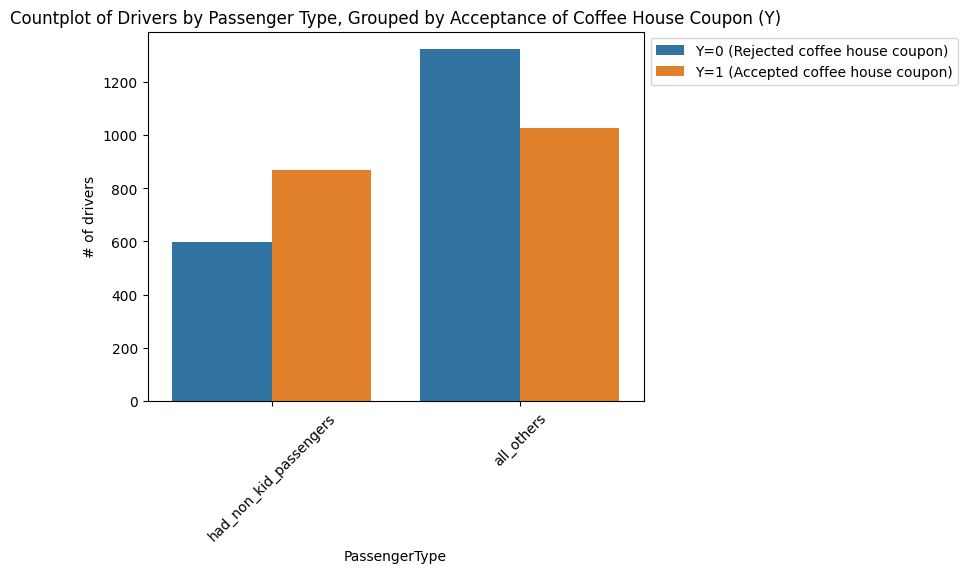

In [21]:
sns.countplot(x='PassengerType', data=df_coffee, hue='Y')
plt.title('Countplot of Drivers by Passenger Type, Grouped by Acceptance of Coffee House Coupon (Y)')
plt.legend(labels=['Y=0 (Rejected coffee house coupon)','Y=1 (Accepted coffee house coupon)'], \
          bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.xlabel('PassengerType')
plt.ylabel('# of drivers')

## This plot below shows similar trend, where drivers with non-kid passengers were more likely to
## accept the coffee bar coupon compared to other drivers.

In [37]:
def coffee_freq(f):
    ## This function checks how often the driver visits the coffee house.
    visits_gt1 = ['1~3','4~8','gt8'] # categories of CoffeeHouse column showing visit freq >= 1
    
    if (f in visits_gt1):
        return 'visits>=1'
    else: return 'visits<1'


# create new column 'freq' indicating if # of visits to coffee house is >= or < 1    
df_coffee.loc[:, 'freq'] = df_coffee['CoffeeHouse'].apply(coffee_freq)

# group by freq to compute total # of coupons for each group
df_coffee_grTotal = df_coffee.groupby('freq')[['Y']].agg('count')
# group by freq to compute # of coupons accepted for each group
df_coffee_grAccept = df_coffee.groupby('freq')[['Y']].agg('sum')
# compute accept ratio by dividing # of coupons accepted by total # of coupons for each group
df_coffee_grAcceptRatio = df_coffee_grAccept / df_coffee_grTotal
df_coffee_grAcceptRatio.rename(columns={'Y':'CouponAcceptRatio'}, inplace=True)
df_coffee_grAcceptRatio

## Conclusion here is that drivers who visit the coffee house more frequently, more than once, have higher
## acceptance rate for the coffee house coupon compared to drivers who visit less than once.
## Acceptance rate for 1 or more visits is 65.9% and acceptance rate for less than 1 visit is 34.0%.

,CouponAcceptRatio
freq,
visits<1,0.340349
visits>=1,0.658994


Text(0, 0.5, '# of drivers')

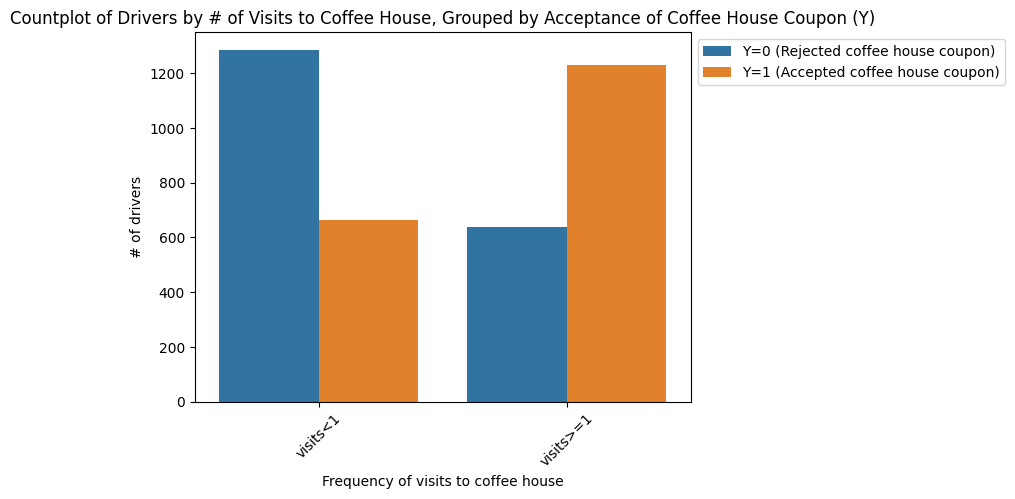

In [39]:
sns.countplot(x='freq', data=df_coffee, hue='Y')
plt.title('Countplot of Drivers by # of Visits to Coffee House, Grouped by Acceptance of Coffee House Coupon (Y)')
plt.legend(labels=['Y=0 (Rejected coffee house coupon)','Y=1 (Accepted coffee house coupon)'], \
          bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.xlabel('Frequency of visits to coffee house')
plt.ylabel('# of drivers')

## This plot below shows similar trend, where group of drivers visiting the coffee house more than once has
## higher acceptance rate compared to drivers visiting the coffee house less than once.

In [41]:
def coffee_freq_n_passenger_n_age(f,passenger,age):
    ## This function checks if the driver satisfies these 3 characteristics:
    ##     1) visits the coffee house more than once
    ##     2) has a passenger who is not a kid
    ##     3) age < 30
    visits_gt1 = ['1~3','4~8','gt8'] # categories of CoffeeHouse column showing visit freq >= 1
    nonKidPassengers = ['Friend(s)','Partner'] # Having passengers who are not kids excludes Alone and Kid(s)
    age_lt30 = ['below21','21','26'] # whoever is below age 30
    
    if ((f in visits_gt1) and (passenger in nonKidPassengers) and (age in age_lt30)):
        return 'had_non_kid_passengers_and_visits>=1_and_age<30'
    else: return 'all_others'
    
# create new column 'cat2' indicating having all 3 characteristics mentioned above 
# (coffee_freq_n_passenger_n_age function documentation) vs. all others    
df_coffee.loc[:,'cat2'] = df_coffee.apply(lambda r: coffee_freq_n_passenger_n_age(r['CoffeeHouse'], \
                                                                                  r['passanger'],\
                                                                                  r['age']), axis=1)

# group by cat2 to compute total # of coupons for each group
df_coffee_grTotal = df_coffee.groupby('cat2')[['Y']].agg('count')
# group by cat2 to compute # of coupons accepted for each group
df_coffee_grAccept = df_coffee.groupby('cat2')[['Y']].agg('sum')
# compute accept ratio by dividing # of coupons accepted by total # of coupons for each group
df_coffee_grAcceptRatio = df_coffee_grAccept / df_coffee_grTotal
df_coffee_grAcceptRatio.rename(columns={'Y':'CouponAcceptRatio'}, inplace=True)
df_coffee_grAcceptRatio

## Conclusion is that having non-kid passengers, visiting the bar more than once, and age < 30 increases 
## the acceptance rate to 78.6% (very high probability of accepting the coffee house coupon).

,CouponAcceptRatio
cat2,
all_others,0.464514
had_non_kid_passengers_and_visits>=1_and_age<30,0.785714


Text(0, 0.5, '# of drivers')

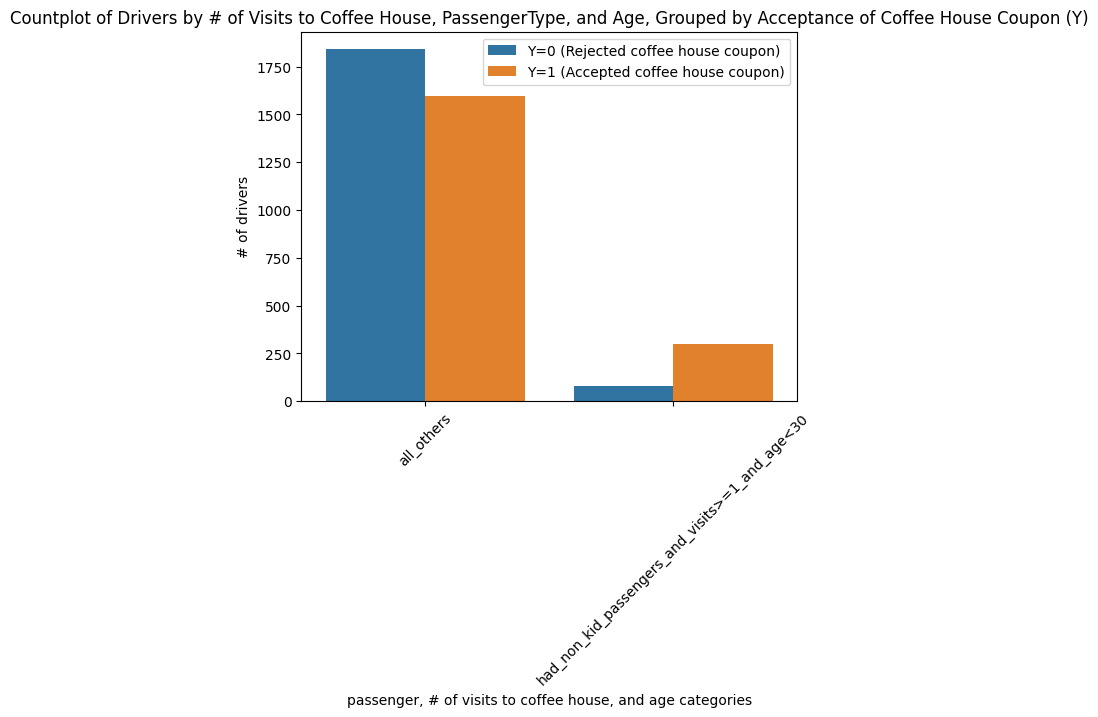

In [44]:
sns.countplot(x='cat2', data=df_coffee, hue='Y')
plt.title('Countplot of Drivers by # of Visits to Coffee House, PassengerType, and Age, Grouped by Acceptance of Coffee House Coupon (Y)')
plt.legend(labels=['Y=0 (Rejected coffee house coupon)','Y=1 (Accepted coffee house coupon)'], \
          bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.xlabel('passenger, # of visits to coffee house, and age categories')
plt.ylabel('# of drivers')

## This plot below shows that having non-kid passengers, visiting the bar more than once, and age < 30 increases 
## the probability of the driver accepting the coffee house coupon.

In [51]:
## Grouping by age and checking the acceptance rate to confirm that there is some correlation between 
## age and acceptance rate.

# group by age to compute total # of coupons for each group
df_coffee_grTotal = df_coffee.groupby('age')[['Y']].agg('count')
# group by age to compute # of coupons accepted for each group
df_coffee_grAccept = df_coffee.groupby('age')[['Y']].agg('sum')
# compute accept ratio by dividing # of coupons accepted by total # of coupons for each group
df_coffee_grAcceptRatio = df_coffee_grAccept / df_coffee_grTotal
df_coffee_grAcceptRatio.rename(columns={'Y':'CouponAcceptRatio'}, inplace=True)
l1 = ['below21','21','26','31','36','41','46','50plus']
df_coffee_grAcceptRatio = df_coffee_grAcceptRatio.loc[l1]
df_coffee_grAcceptRatio

,CouponAcceptRatio
age,
below21,0.678322
21,0.517773
26,0.513174
31,0.483816
36,0.468586
41,0.492114
46,0.506912
50plus,0.419660


Text(0, 0.5, 'Coffee House Coupon Acceptance Rate')

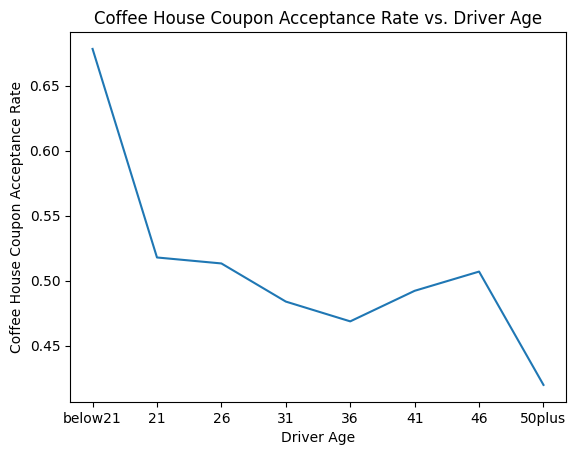

In [54]:
df_coffee_grAcceptRatio.reset_index(inplace=True)
plt.plot('age','CouponAcceptRatio',data=df_coffee_grAcceptRatio)
plt.title('Coffee House Coupon Acceptance Rate vs. Driver Age')
plt.xlabel('Driver Age')
plt.ylabel('Coffee House Coupon Acceptance Rate')

## I created this line plot below which confirms that acceptance rate is higher for younger drivers
## and lower for older drivers.  This shows that there is some correlation between driver age and acceptance rate
## for coffee house coupons.

In [59]:
## Grouping by temperature and checking the acceptance rate to confirm that there is some correlation between 
## temperature and acceptance rate.

# group by temperature to compute total # of coupons for each group
df_coffee_grTotal = df_coffee.groupby('temperature')[['Y']].agg('count')
# group by temperature to compute # of coupons accepted for each group
df_coffee_grAccept = df_coffee.groupby('temperature')[['Y']].agg('sum')
# compute accept ratio by dividing # of coupons accepted by total # of coupons for each group
df_coffee_grAcceptRatio = df_coffee_grAccept / df_coffee_grTotal
df_coffee_grAcceptRatio.rename(columns={'Y':'CouponAcceptRatio'}, inplace=True)
df_coffee_grAcceptRatio

,CouponAcceptRatio
temperature,
30,0.441472
55,0.452010
80,0.526980


Text(0, 0.5, 'Coffee House Coupon Acceptance Rate')

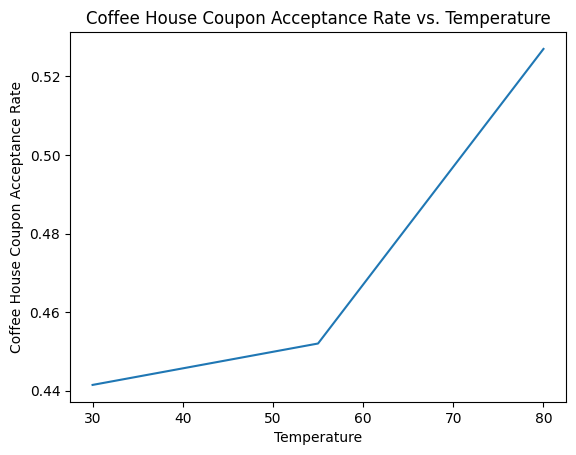

In [61]:
df_coffee_grAcceptRatio.reset_index(inplace=True)
plt.plot('temperature','CouponAcceptRatio',data=df_coffee_grAcceptRatio)
plt.title('Coffee House Coupon Acceptance Rate vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Coffee House Coupon Acceptance Rate')

## I created this line plot below which confirms that acceptance rate is higher as temperature gets warmer.

Summary and conclusions for the coffee house coupon dataset:

Combination (one or more of) of these driver characteristics increases the probability of the driver accepting the coffee house coupon:

    1) Visits the coffee house more than once 
    2) Has a passenger who is not a kid 
    3) Age < 30 (Younger drivers are more likely to accept the coffee house coupon)
    
Also, drivers are more likely to accept this coupon at warmer temperatures (80 degrees) compared to colder temperatures.
    